### Generating Synthethic Populations

Generate populations of planetary systems from the model in Mulders+ 2018

In [1]:
import EPOS
import numpy as np
import matplotlib.pyplot as plt

initialize the EPOS class with the kepler dr25 exoplanets and survey completeness, updated with gaia dr2 stellar radii

In [2]:
epos= EPOS.epos(name='population', survey='Kepler')


 |~| epos 3.0.0.dev4 |~|


Using random seed 3261128231

Survey: Kepler-Gaia all dwarfs


Define the functions that describes the intrinsic planetary system population. Here we use a double broken power-law from EPOS.fitfunctions to deinfe the location and size of the innermost planet in each system.

In [3]:
epos.set_parametric(EPOS.fitfunctions.brokenpowerlaw2D)
epos.set_multi(spacing='dimensionless')

Fir parameters from Mulders+ 2018 table 2

In [4]:
epos.fitpars.add('pps',		0.67, 	fixed=True, isnorm=True)
epos.fitpars.add('P break',	12.,	fixed=True,	is2D=True)
epos.fitpars.add('a_P',		1.6, 	fixed=True,	is2D=True)
epos.fitpars.add('b_P',		-0.9,	fixed=True,	is2D=True)
epos.fitpars.add('R break',	3.3,	fixed=True, is2D=True) 
epos.fitpars.add('a_R',		-0.5,	fixed=True, is2D=True)
epos.fitpars.add('b_R',		-6.,	fixed=True, is2D=True)
epos.fitpars.add('npl', 10, fixed=True) # planets per system
epos.fitpars.add('log D', -0.39, fixed=True)
epos.fitpars.add('sigma', 0.18, fixed=True)
epos.fitpars.add('inc', 2.0)				# mode of mutual inclinations
epos.fitpars.add('f_iso', 0.4)				# Fraction of isotropic systems
epos.fitpars.add('dR', 0.15, fixed=True)

Generate an observable planet population with the inital guess and compare it to Kepler

In [5]:
EPOS.run.once(epos)


Preparing EPOS run...
  6 fit parameters
  Set f_cor to default 0.5

Starting the first MC run
Finished one MC in 0.601 sec


Show the simulated detections and the detectable planet architectures, compared to the observations

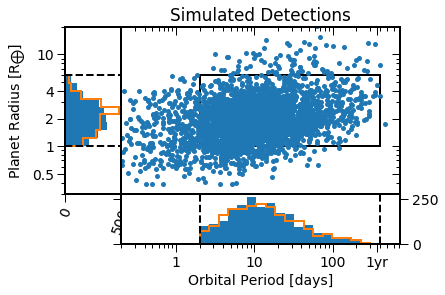

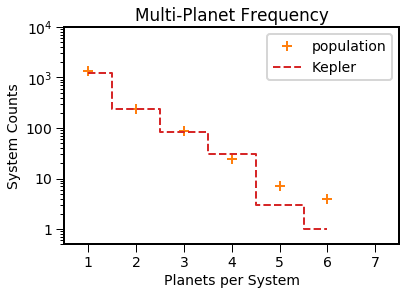

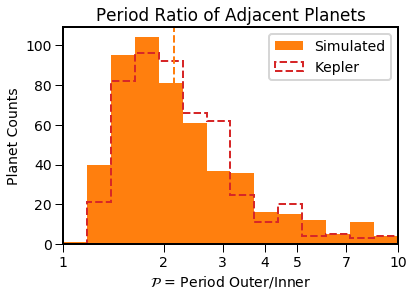

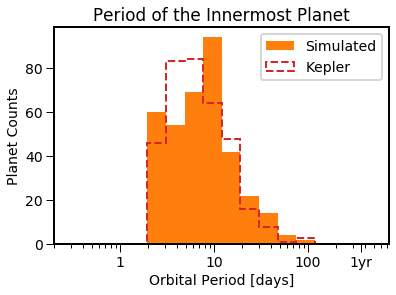

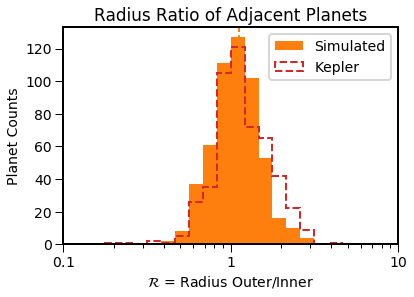

In [6]:
EPOS.plot.periodradius.panels(epos, NB=True)
EPOS.plot.multi.multiplicity(epos, MC=True, NB=True)
EPOS.plot.multi.periodratio(epos, MC=True, NB=True)
EPOS.plot.multi.periodinner(epos, MC=True, NB=True)
EPOS.plot.multi.radiusratio(epos, MC=True, NB=True)

Save the generated planet populations to a csv file

In [7]:
#import importlib; importlib.reload(EPOS.save)
name= 'population-0.15dex'
popdict= dict(all_systems=epos.population, 
              transiting_systems= epos.population['system'],
             transiting_planets= epos.synthetic_survey)

for key, pop in popdict.items():
    fname= 'csv/'+name+'_'+key
    EPOS.save.to_csv(fname, starID= pop['ID'], Period_days= pop['P'], Radius_earth= pop['Y'])

Let's look at how the observation bias shapes the observed distributions

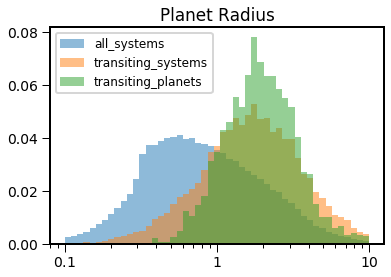

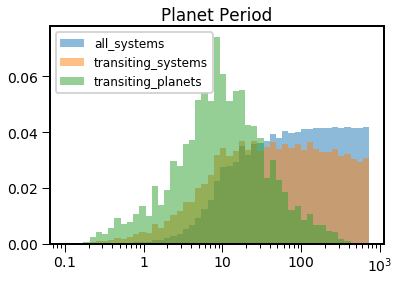

In [8]:
plt.title('Planet Radius')
plt.semilogx()
for key, pop in popdict.items():
    plt.hist(pop['Y'], bins=np.geomspace(0.1,10), label=key, alpha=0.5,
             weights=np.full(pop['Y'].shape,1./pop['Y'].size) )

plt.legend()
plt.show()

plt.title('Planet Period')
plt.semilogx()
for key, pop in popdict.items():
    plt.hist(pop['P'], bins=np.geomspace(0.1,730), label=key, alpha=0.5,
            weights=np.full(pop['P'].shape,1./pop['P'].size) )

plt.legend()
plt.show()

And the multi-planet architectures

In [13]:
archdict= {}

popdict= dict(all_systems=epos.population, 
              transiting_systems= epos.population['system'],
             transiting_planets= epos.synthetic_survey)

for key, pop in popdict.items():
    dP, Pin, dR= EPOS.multi.periodratio(pop['ID'], pop['P'], R= pop['Y'])
    archdict[key]= dict(dP=dP, Pin=Pin, dR=dR)
    
    fname= 'csv/'+'planet-pairs-0.15dex'+'_'+key
    EPOS.save.to_csv(fname, period_ratio= dP, radius_ratio= dR)
    
    fname= 'csv/'+'inner-planet-0.15dex'+'_'+key
    EPOS.save.to_csv(fname, inner_period=Pin)

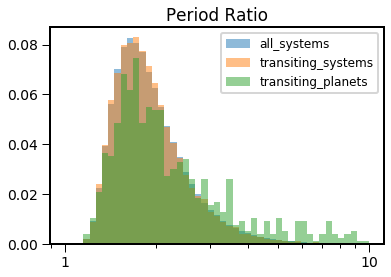

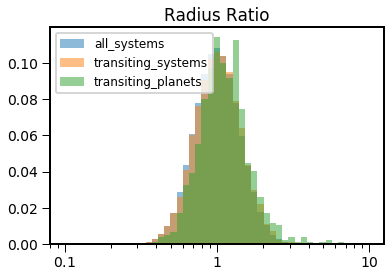

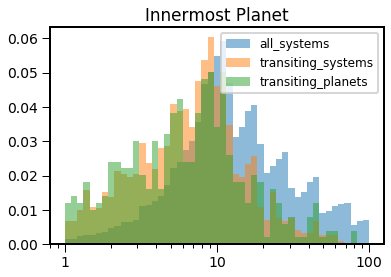

In [14]:
plt.title('Period Ratio')
plt.semilogx()

for key, arch in archdict.items():
    plt.hist(arch['dP'], bins=np.logspace(0,1), label=key, alpha=0.5,
             weights=np.full(arch['dP'].shape,1./arch['dP'].size) )
plt.legend()
plt.show()

plt.title('Radius Ratio')
plt.semilogx()

for key, arch in archdict.items():
    plt.hist(arch['dR'], bins=np.logspace(-1,1), label=key, alpha=0.5,
             weights=np.full(arch['dR'].shape,1./arch['dR'].size) )
plt.legend()
plt.show()

plt.title('Innermost Planet')
plt.semilogx()

for key, arch in archdict.items():
    plt.hist(arch['Pin'], bins=np.geomspace(1,100), label=key, alpha=0.5,
             weights=np.full(arch['Pin'].shape,1./arch['Pin'].size) )
plt.legend()
plt.show()